In [10]:
import dowhy
from dowhy import CausalModel
# from rpy2.robjects import r as R
# %load_ext rpy2.ipython
import numpy as np
import pandas as pd
import graphviz
import networkx as nx


def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.01
    dirs = np.where(idx)
    d = graphviz.Digraph(engine='dot')
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for name in names:
        d.node(name)
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=str(coef))
    return d


def str_to_dot(string):
    '''
    Converts input string from graphviz library to valid DOT graph format.
    '''
    graph = string.replace('\n', ';').replace('\t', '')
    graph = graph[:9] + graph[10:-2] + graph[-1]  # Removing unnecessary characters from string
    return graph


df = pd.read_csv("../data/data.csv")

df.dropna(subset=["AGE", "SYSBP", "DIABP", "CURSMOKE", "BPMEDS", "CVD"], inplace=True)
df["BPMEDS"] = df["BPMEDS"].astype(int)
df = df[["AGE", "SYSBP", "DIABP", "CURSMOKE", "BPMEDS", "CVD"]]
print(df.shape)


(11034, 6)
       AGE  SYSBP  DIABP  CURSMOKE  BPMEDS  CVD
0       39  106.0   70.0         0       0    1
1       52  121.0   66.0         0       0    1
2       46  121.0   81.0         0       0    0
3       52  105.0   69.5         0       0    0
4       58  108.0   66.0         0       0    0
...    ...    ...    ...       ...     ...  ...
11622   46  126.0   82.0         0       0    0
11623   52  143.0   89.0         0       0    0
11624   39  133.0   86.0         1       0    0
11625   46  138.0   79.0         1       0    0
11626   50  147.0   96.0         1       0    0

[11034 rows x 6 columns]


Method : LiNGAM


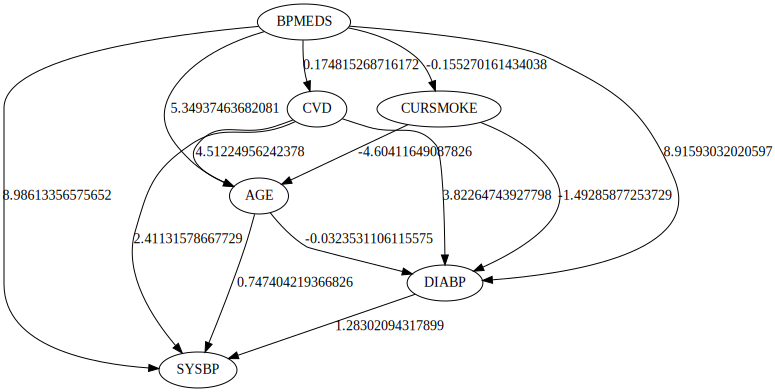

Method : PC


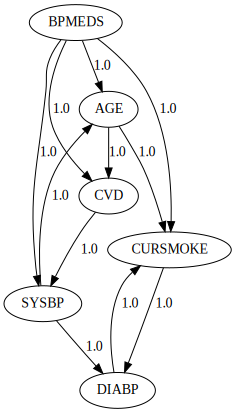

Method : GES


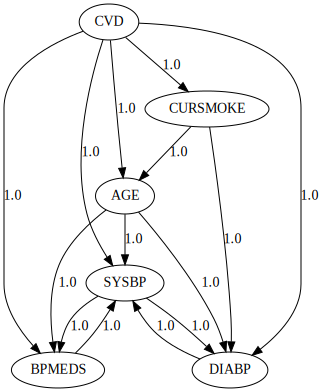

In [11]:
import cdt
from cdt.causality.graph import LiNGAM, PC, GES

cdt.SETTINGS.rpath = 'C:/Program Files/R/R-4.1.2/bin/Rscript'
graphs = {}
labels = [f'{col}' for i, col in enumerate(df.columns)]
functions = {
    'LiNGAM': LiNGAM,
    'PC': PC,
    'GES': GES,
}

for method, lib in functions.items():
    obj = lib()
    output = obj.predict(df)
    adj_matrix = nx.to_numpy_matrix(output)
    adj_matrix = np.asarray(adj_matrix)
    graph_dot = make_graph(adj_matrix, labels)
    graphs[method] = graph_dot

# Visualize graphs
for method, graph in graphs.items():
    print("Method : %s" % method)
    display(graph)